              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000  
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.946128  
std      0.994914   22.941562 

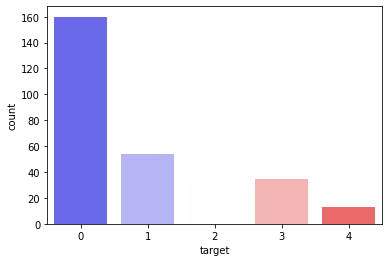

Logistic Regression:
Accuracy: 63.33%
Confusion matrix:
 [[35  1  0  0  0]
 [ 5  1  1  2  0]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 2  0  0  1  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       0.20      0.11      0.14         9
           2       0.33      0.20      0.25         5
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.30      0.29      0.28        60
weighted avg       0.55      0.63      0.58        60



Decision Tree:
Accuracy: 60.00%
Confusion matrix:
 [[35  0  1  0  0]
 [ 5  0  4  0  0]
 [ 4  0  1  0  0]
 [ 1  0  6  0  0]
 [ 2  0  1  0  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.97      0.84        36
           1       0.00      0.00      0.00         9
        

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Veri kümesini oku
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(data_url, names=names)

# Eksik verileri işle
data = data.replace('?', np.nan)
data = data.dropna()

# Veri kümesinin istatistiklerini görüntüle
print(data.describe())

# Hedef değişkenin sınıf sayısını görüntüle
print(data.groupby('target').size())

# Veri görselleştirme
sns.countplot(x='target', data=data, palette='bwr')
plt.show()

# Verileri özellikler ve hedef değişken olarak ayır
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Verileri eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri standartlaştır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model eğitimi
pipe_lr = Pipeline([('lr', LogisticRegression())])
pipe_dt = Pipeline([('dt', DecisionTreeClassifier())])
pipe_rf = Pipeline([('rf', RandomForestClassifier())])

# Grid Search ile en iyi parametreleri belirle
param_grid_lr = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_dt = {'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_rf = {'rf__n_estimators': [50, 100, 200, 300, 400, 500]}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, cv=10, n_jobs=-1)
grid_dt = GridSearchCV(pipe_dt, param_grid=param_grid_dt, cv=10, n_jobs=-1)
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=10, n_jobs=-1)

# Eğitim verileri üzerinde modelleri uyumla
grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# En iyi modeli bul
models = {'Logistic Regression': grid_lr.best_estimator_, 
          'Decision Tree': grid_dt.best_estimator_, 
          'Random Forest': grid_rf.best_estimator_}

# En iyi modelin performansını test etme
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model_name + ':')
    print('Accuracy: {:.2f}%'.format(accuracy * 100))
    print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('\n')